# 약콩 라인

- skincare16	[보습장벽] 라운드랩 약콩 판테놀 앰플 50ml 기획 (+약콩 크림 20ml)
- skincare17	[보습장벽] 라운드랩 약콩 판테놀 크림 80ml 기획 (+약콩 크림 20ml)

## 파일불러오기

In [1]:
#skincare16 앰플
import pandas as pd
file_path = r"C:\Users\82108\Downloads\제품리뷰전처리\skincare16_crc.xlsx"
skincare16_crc_df = pd.read_excel(file_path)
print(skincare16_crc_df)

                                          0
0                      앰풀 필요 구매 촉촉 마음 들 ᆸ니다
1                                        추천
2                                     아주 어요
3                            추천 쓰 잘 쓰 있 습니다
4                               흐흐흐 다 쓰 또 사
...                                     ...
1578  개인 악 건성 너무 건조 어떡하 있 대로 깊 보습 너무 만족 ᆸ니다
1579                            다 쓰 크림 사 어요
1580               사계절 쓰 가을 겨울 진짜 잘 쓰 같 습니다
1581                            순하 무 향 보습 짱
1582                       이번 라운드 랩 라운드 랩 다

[1583 rows x 1 columns]


In [2]:
#skincare17 크림
import pandas as pd
file_path = r"C:\Users\82108\Downloads\제품리뷰전처리\skincare17_crc.xlsx"
skincare17_crc_df = pd.read_excel(file_path)
print(skincare17_crc_df)

                                                     0
0                                               이거 뭐 야
1       발림 미치 유수 균형 잘 맞 수분 부족 지성 적당 보습 감 괜히 피부 기분 들 어요
2                                    일단 사용 감 너무 만족 습니다
3                                          달 후기 돌아오 어요
4                                         온라인 주문 쓰 ᆸ니다
..                                                 ...
344                          지금 밤 얇 번 바르 수면 팩 사용 중 ᆸ니다
345                         기존 콩 크림 너무 잘 사용 단장 제품 사 어요
346                      여드름 피부 제품 순하 보습 넘치 피부 잘 맞 습니다
347                                 앞 크림 기초 제품 정착 같 어요
348  기존 라운드 랩 약 콩 크림 판테놀 성분 추가 기존 성분 훨씬 강화 크림 사용 감 ...

[349 rows x 1 columns]


In [3]:
import pandas as pd

# 데이터프레임을 리스트에 저장(단품)
dataframes_list1 = [
    skincare16_crc_df,
    skincare17_crc_df
]

dataframes_list1

[                                          0
 0                      앰풀 필요 구매 촉촉 마음 들 ᆸ니다
 1                                        추천
 2                                     아주 어요
 3                            추천 쓰 잘 쓰 있 습니다
 4                               흐흐흐 다 쓰 또 사
 ...                                     ...
 1578  개인 악 건성 너무 건조 어떡하 있 대로 깊 보습 너무 만족 ᆸ니다
 1579                            다 쓰 크림 사 어요
 1580               사계절 쓰 가을 겨울 진짜 잘 쓰 같 습니다
 1581                            순하 무 향 보습 짱
 1582                       이번 라운드 랩 라운드 랩 다
 
 [1583 rows x 1 columns],
                                                      0
 0                                               이거 뭐 야
 1       발림 미치 유수 균형 잘 맞 수분 부족 지성 적당 보습 감 괜히 피부 기분 들 어요
 2                                    일단 사용 감 너무 만족 습니다
 3                                          달 후기 돌아오 어요
 4                                         온라인 주문 쓰 ᆸ니다
 ..                                                 ...
 344                          지금 밤 얇 번 바

# 약콩 감성분석

In [4]:
# 형태소 분석기
from konlpy.tag import Okt
okt = Okt()

# SentiWord_Dict.txt 감성사전 불러오기
def load_senti_dict(file_path):
    senti_dict = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()  # 공백으로 분리
            if len(parts) > 1:
                word = ' '.join(parts[:-1])  # 마지막 항목을 제외한 나머지를 단어로 결합
                score = int(parts[-1])  # 마지막 항목을 점수로 처리
                senti_dict[word] = score
            else:
                print(f"해당 줄을 무시합니다: {line}")
    return senti_dict

# 감성 사전 로드
senti_dict = load_senti_dict(r"C:\Users\82108\Downloads\KnuSentiLex-master(1)\KnuSentiLex-master\SentiWord_Dict.txt")

# 감성 분석 함수 
def analyze_sentiment(text, senti_dict):
    # 형태소 분석
    morphs = okt.morphs(text)
    
    # 감정 점수 계산
    sentiment_score = 0
    for word in morphs:
        if word in senti_dict:  # 단어가 사전에 있는 경우
            sentiment_score += senti_dict[word]
    
    # 점수에 따라 감정 판단
    if sentiment_score > 0:
        return "긍정"
    elif sentiment_score < 0:
        return "부정"
    else:
        return "중립"

# 긍정/부정/중립

In [5]:
#단품 리스트
# 데이터프레임과 이름을 튜플로 저장
dataframes = [
    ("skincare16_crc_df", skincare16_crc_df),
    ("skincare17_crc_df", skincare17_crc_df),
]

results_list = []

# 각 데이터프레임 처리 및 결과 출력
for name, df in dataframes:
    print(f"Processing DataFrame: {name}")
    
    # 텍스트를 리스트로 변환
    skincare_text_list1 = df.iloc[:, 0].astype(str).tolist()
    
    # 감성 분석 수행
    skincare_results1 = [(text, analyze_sentiment(text, senti_dict)) for text in skincare_text_list1]
    
    # 결과 데이터프레임 생성
    skincare_results1_df = pd.DataFrame(skincare_results1, columns=['Text', 'Sentiment'])
    
    # 결과를 리스트에 저장
    results_list.append((name, skincare_results1_df))
    
    # 결과 출력
    print(skincare_results1_df)
    print("\n")  # 각 데이터프레임 결과 사이에 공백 추가

Processing DataFrame: skincare16_crc_df
                                       Text Sentiment
0                      앰풀 필요 구매 촉촉 마음 들 ᆸ니다        중립
1                                        추천        중립
2                                     아주 어요        중립
3                            추천 쓰 잘 쓰 있 습니다        긍정
4                               흐흐흐 다 쓰 또 사        중립
...                                     ...       ...
1578  개인 악 건성 너무 건조 어떡하 있 대로 깊 보습 너무 만족 ᆸ니다        긍정
1579                            다 쓰 크림 사 어요        중립
1580               사계절 쓰 가을 겨울 진짜 잘 쓰 같 습니다        긍정
1581                            순하 무 향 보습 짱        중립
1582                       이번 라운드 랩 라운드 랩 다        중립

[1583 rows x 2 columns]


Processing DataFrame: skincare17_crc_df
                                                  Text Sentiment
0                                               이거 뭐 야        중립
1       발림 미치 유수 균형 잘 맞 수분 부족 지성 적당 보습 감 괜히 피부 기분 들 어요        중립
2                                    일단 사용 감 너무 만족

# 긍정/부정/중립 리스트 만들기

In [6]:
import pandas as pd
from konlpy.tag import Okt

# 형태소 분석기 초기화
okt = Okt()

# 감성 분석 함수 정의
def analyze_sentiment(text, senti_dict):
    # 형태소 분석
    morphs = okt.morphs(text)
    
    # 감정 점수 계산
    sentiment_score = 0
    for word in morphs:
        if word in senti_dict:  # 단어가 사전에 있는 경우
            sentiment_score += senti_dict[word]
    
    # 점수에 따라 감정 판단
    if sentiment_score > 0:
        return "긍정"
    elif sentiment_score < 0:
        return "부정"
    else:
        return "중립"


# 데이터프레임과 이름을 튜플로 저장
dataframes = [
    ("skincare16_crc_df", skincare16_crc_df),
    ("skincare17_crc_df", skincare17_crc_df),
]

# 결과를 저장할 딕셔너리 (각 데이터프레임별로)
results_dict = {}

# 각 데이터프레임 처리 및 감정 분석 수행
for name, df in dataframes:
    print(f"Processing DataFrame: {name}")
    
    # 텍스트를 리스트로 변환
    text_list = df.iloc[:, 0].astype(str).tolist()
    
    # 긍정, 부정, 중립 리스트 초기화
    positive_list = []
    negative_list = []
    neutral_list = []
    
    # 감성 분석 수행 및 리스트에 저장
    for text in text_list:
        sentiment = analyze_sentiment(text, senti_dict)
        if sentiment == "긍정":
            positive_list.append(text)
        elif sentiment == "부정":
            negative_list.append(text)
        else:
            neutral_list.append(text)
    
    # 결과를 각 데이터프레임 이름별로 저장
    results_dict[name] = {
        "긍정": positive_list,
        "부정": negative_list,
        "중립": neutral_list
    }


Processing DataFrame: skincare16_crc_df
Processing DataFrame: skincare17_crc_df


In [7]:
results_dict['skincare16_crc_df']

{'긍정': ['추천 쓰 잘 쓰 있 습니다',
  '크기 적당 비싸 않 같 열심히 쓰 있 어요',
  '유튜브 보 궁금 구매 보 드라마틱 영향 잘 모르 바르 나 촉촉 어요 가성비 용량 크',
  '꾸준히 쓰 속 건조 주 듯 어요',
  '않 촉촉 제형 흡수 잘 되 어요',
  '겨울철 사용 제품 적당량 바르 보습 잘 되 피붓결 같 어요',
  '진짜 최고 피부 장벽 다 뒤집어지 때 뭐 바르 콩 안 진정 보습 탄탄하 장벽 선사 주 최고 터 ᆷ 콩 라인 죽 때 쓰 ᆯ게요',
  '자극 안 느끼 보습 잘 느끼 상품 에요',
  '그래도 꾸준히 쓰 효과 을까 싶 어 꾸준히 쓰 보 있 어요',
  '만족 ᆸ니다',
  '잘 발리 바르 나 진정 잘 되 느낌 판테놀 최고 중 최고',
  '잘 쓰 습니다',
  '근데 기능 잘 모르 느낌',
  '피부 장벽 다 무너지 때 사용 보 뭐 쓰 화끈거리 피부 편안 싹 진정 어요',
  '악 건성 피부 보습 소소하 번 단계 주 끈적거리 않 편안 어요',
  '후기 안 찾아보 매장 결 럼 되 있 충동 구매 너무 만족 어요',
  '속 건조 있 으시 이것 수분 유수 균형 잘 주 ᆸ니다',
  '자극 느끼 못 건성 피부 잘 맞 같 만족 상품 ᆸ니다',
  '피부 장벽 무너지 보습 아무리 열심히 건조 판테놀 앰풀 성분 속 건조 더 주 같 저 잘 쓰 있 어요',
  '자극 없이 순하 개인 아침 바르 하루 종일 건조 않 만족 ᆸ니다',
  '친구 추천 주 어요',
  '너무 않 흡수 잘 되',
  '피부 자극 있 없 편안 잘 사용 있 어요',
  '흡수 잘 되 화장 때 밀리 않 너무 어요',
  '같이 들 있 크림 쓰 주 보습 잘 되 같 어요',
  '용기 스포이트 되 있 쓰 편하 제형 주르륵 흘러내리 편 더 쓰 같 어요',
  '주간 꾸준히 쓰 보 유수부 발란스 잘 맞추 앰풀 결론',
  '밀리 느낌 X 코팅 듯 빤빤 답답하 없 잘 흡수 건조 느낌 없 음',
  '앰풀 라운드 랩 독도 로션 조합 쓰 핵 만족 습니다',
  '주로 밤 사용 있 

In [8]:
#결과 수 확인
df_name = 'skincare16_crc_df'

if df_name in results_dict:
    # 긍정 항목의 수 출력
    positive_count = len(results_dict[df_name]['긍정'])
    print(f"긍정 항목의 수 for {df_name}: {positive_count}")

    # 부정 항목의 수 출력
    negative_count = len(results_dict[df_name]['부정'])
    print(f"부정 항목의 수 for {df_name}: {negative_count}")

    # 중립 항목의 수 출력
    neutral_count = len(results_dict[df_name]['중립'])
    print(f"중립 항목의 수 for {df_name}: {neutral_count}")

    # 전체 항목의 수 계산 및 출력
    total_count = positive_count + negative_count + neutral_count
    print(f"\n전체 항목의 수 for {df_name}: {total_count}")
else:
    print(f"No results found for {df_name}")


긍정 항목의 수 for skincare16_crc_df: 327
부정 항목의 수 for skincare16_crc_df: 58
중립 항목의 수 for skincare16_crc_df: 1198

전체 항목의 수 for skincare16_crc_df: 1583


In [9]:
#결과 수 확인
df_name = 'skincare17_crc_df'

if df_name in results_dict:
    # 긍정 항목의 수 출력
    positive_count = len(results_dict[df_name]['긍정'])
    print(f"긍정 항목의 수 for {df_name}: {positive_count}")

    # 부정 항목의 수 출력
    negative_count = len(results_dict[df_name]['부정'])
    print(f"부정 항목의 수 for {df_name}: {negative_count}")

    # 중립 항목의 수 출력
    neutral_count = len(results_dict[df_name]['중립'])
    print(f"중립 항목의 수 for {df_name}: {neutral_count}")

    # 전체 항목의 수 계산 및 출력
    total_count = positive_count + negative_count + neutral_count
    print(f"\n전체 항목의 수 for {df_name}: {total_count}")
else:
    print(f"No results found for {df_name}")


긍정 항목의 수 for skincare17_crc_df: 59
부정 항목의 수 for skincare17_crc_df: 9
중립 항목의 수 for skincare17_crc_df: 281

전체 항목의 수 for skincare17_crc_df: 349


In [10]:
#부정
# 특정 데이터프레임의 긍정, 부정, 중립 결과를 한 번에 출력하는 코드
df_name = 'skincare16_crc_df'

if df_name in results_dict:
    #print(f"긍정 리스트 for {df_name}:")
    #for item in results_dict[df_name]['긍정']:
        #print(f"- {item}")
    
    print("\n부정 리스트:")
    for item in results_dict[df_name]['부정']:
        print(f"- {item}")

    #print("\n중립 리스트:")
    #for item in results_dict[df_name]['중립']:
        #print(f"- {item}")
else:
    print(f"No results found for {df_name}")



부정 리스트:
- 촉촉하 요건 성분 단독 쓰 좀 부족 같 저 수분 부족 지성인 분 쓰 같 어요
- 수분 부족 지성 촉촉하 진정 어요
- 근데 또 유분 부담 분 이거 사용 시 되 ᆸ니다
- 순하 보습 감 좀 부족 같 네요
- 원래 독도 로션 토너 쓰 었었 독도 순하 보습 부족 느낌 거든요
- 티 존 쓰 불안 볼때기 쓰 중 레틴올 모공 좀 작 느낌
- 심 민감 여드름 피부 한번 정착 힘들 계절 내내 장벽 크림 쓰 겨울 콩 주야 장천 쓰 네요
- 저 몸살 기운 오 면역력 떨어지 때 있 때 피부 영향 있 더라고
- 앰풀 순하 유분 없이 깔끔 쓰 수 있 지성 피부 부담감 없이 쓰 어요
- 효과 직 방 자극 거의 없 부담 없이 쓰 네요
- 수분 부족 지성 강력 추천 원래 화장 나가 볼 다 뜨 이거 바르 첫날 덜 뜨 둘째 날 거의 안 뜨 인제 아예 안 뜨 ᆷ
- 메이크업 전 발라 방해 안 되 부담 없 증정 들 있 크림 쓰 보 수 있 어요
- 요즘 피로 때문 피붓결 푸석푸석 거칠 속 건조 앰풀 덕분 피붓결 보들보들 어요
- 아쉬움
- 두통 ᆸ니다
- 워낙 피부 마약 바로 그러 않
- 병 가격 부담 없 네요
- 촉촉하 끈적이 없 수분 부족 지성 부담 없이 같 어요
- 촉촉하 끈적이 없 수분 부족 지성 부담 없이 같 어요
- 악성 건조 앰 풀 전체 흡수 되 ᆫ다
- 아침 사용 부담 않 어요
- 라운드 랩 대부분 실망 없이 쓰 기초 라인 같 습니다
- 악성 성인 저 좀 안 맞 사용 안 었었 어요
- 자극 없 편 예민 피부 걱정 없이 사용 수 있 습니다
- 앰풀 쓰 살짝 부족 느낌 크림 같이 쓰 주 더 효과 느낌 다음 재 구매 의사 있 습니다
- 일 주일 정도 이것 효과 있 너무 유분 있 걱정 계속 쓰 보 세안 나 얼굴 자극 피부 관리 바르 나 손 쓰 피부 다극 되 피부 홍당무 얼굴 붉 기 조금 가라앉 보이 너무 기쁘 어요
- 수분 부족 지성 쓰 괜찮 타입 같 습니다
- 화장품 바꾸 때 안 맞 을까 보 걱정 개시 데 라운드 랩 제품 순하 걱정 없이 잘 사용 있 어요
- 처음 제형

## 엑셀로 저장

In [11]:
#단품 리스트
import pandas as pd

# 결과를 저장할 경로 설정
output_dir = r"C:\Users\82108\Downloads"

# 각 데이터프레임 처리 및 엑셀 파일로 저장
for df_name in results_dict:
    # 긍정 리스트를 데이터프레임으로 변환 및 저장
    skincare_positive_df = pd.DataFrame({'Text': results_dict[df_name]['긍정']})
    skincare_positive_df.to_excel(f"{output_dir}\{df_name}_positive_list_B.xlsx", index=False) #약콩 black soybean

    # 부정 리스트를 데이터프레임으로 변환 및 저장
    skincare_negative_df = pd.DataFrame({'Text': results_dict[df_name]['부정']})
    skincare_negative_df.to_excel(f"{output_dir}\{df_name}_negative_list_B.xlsx", index=False)

    # 중립 리스트를 데이터프레임으로 변환 및 저장
    #skincare_neutral_df = pd.DataFrame({'Text': results_dict[df_name]['중립']})
    #skincare_neutral_df.to_excel(f"{output_dir}\{df_name}_neutral_list.xlsx", index=False)

    print(f"{df_name} 데이터프레임의 긍정, 부정 리스트가 각각 엑셀 파일로 저장되었습니다.")


skincare16_crc_df 데이터프레임의 긍정, 부정 리스트가 각각 엑셀 파일로 저장되었습니다.
skincare17_crc_df 데이터프레임의 긍정, 부정 리스트가 각각 엑셀 파일로 저장되었습니다.


# 약콩 빈도분석

## 엑셀파일 불러오기

In [12]:
import pandas as pd

# 불러올 파일 경로 설정
output_dir = r"C:\Users\82108\Downloads"

# 불러올 데이터프레임 목록
df_names = [
    'skincare16_crc_df',
    'skincare17_crc_df',
]

# 각 데이터프레임 이름별로 데이터를 불러와 개별 변수에 저장
for df_name in df_names:
    # 긍정 리스트 엑셀 파일 불러오기
    positive_df = pd.read_excel(f"{output_dir}\{df_name}_positive_list_B.xlsx")
    positive_var_name = f"{df_name.replace('_df', '')}_positive_list_df"
    globals()[positive_var_name] = positive_df

    # 부정 리스트 엑셀 파일 불러오기
    negative_df = pd.read_excel(f"{output_dir}\{df_name}_negative_list_B.xlsx")
    negative_var_name = f"{df_name.replace('_df', '')}_negative_list_df"
    globals()[negative_var_name] = negative_df

    # 중립 리스트 엑셀 파일 불러오기 (필요한 경우)
    # neutral_df = pd.read_excel(f"{output_dir}\{df_name}_neutral_list.xlsx")
    # neutral_var_name = f"{df_name.replace('_df', '')}_neutral_list_df"
    # globals()[neutral_var_name] = neutral_df

# 예시: skincare12_crc_positive_list_df 출력해보기
print(skincare16_crc_positive_list_df.head())
print(skincare16_crc_negative_list_df.head())


                                             Text
0                                  추천 쓰 잘 쓰 있 습니다
1                         크기 적당 비싸 않 같 열심히 쓰 있 어요
2  유튜브 보 궁금 구매 보 드라마틱 영향 잘 모르 바르 나 촉촉 어요 가성비 용량 크
3                               꾸준히 쓰 속 건조 주 듯 어요
4                               않 촉촉 제형 흡수 잘 되 어요
                                         Text
0  촉촉하 요건 성분 단독 쓰 좀 부족 같 저 수분 부족 지성인 분 쓰 같 어요
1                          수분 부족 지성 촉촉하 진정 어요
2                  근데 또 유분 부담 분 이거 사용 시 되 ᆸ니다
3                           순하 보습 감 좀 부족 같 네요
4         원래 독도 로션 토너 쓰 었었 독도 순하 보습 부족 느낌 거든요


In [13]:
print(skincare17_crc_positive_list_df.head())
print(skincare17_crc_negative_list_df.head())

                       Text
0         일단 사용 감 너무 만족 습니다
1                  아주 만족 어요
2            에센스 가득 향 편리 어요
3           콩 무조건 충성 맹세 ᆸ니다
4  촉촉하 흡수 잘 되 편 자주 사용 있 습니다
                                                Text
0                       저 복합 수분 부족 지성 아토피 트러블 피부 ᆸ니다
1  겨울 그나마 쓰 만 여름 최악 겨울 그냥저냥 쓰 여름 처음 쓰 보 리치 제품 줄 이...
2                                         건성 좀 부족 어요
3                                    나이트 크림 약간 부족 어요
4  바깥 먼지 너무 많 때 수정 화장 시 얼굴 바르 촉촉하 발림 극 건성 작 들 다니 ...


In [14]:
#긍정리스트
positive_list_dfs = [skincare16_crc_positive_list_df, skincare17_crc_positive_list_df]
positive_list_dfs

[                                                  Text
 0                                       추천 쓰 잘 쓰 있 습니다
 1                              크기 적당 비싸 않 같 열심히 쓰 있 어요
 2       유튜브 보 궁금 구매 보 드라마틱 영향 잘 모르 바르 나 촉촉 어요 가성비 용량 크
 3                                    꾸준히 쓰 속 건조 주 듯 어요
 4                                    않 촉촉 제형 흡수 잘 되 어요
 ..                                                 ...
 322                               라운드 랩 최고 가성비 구성 짱 에요
 323  되게 발리 또 속 보습 꽉 채우 주 느낌 근데 앰풀 크림 같이 쓰 때 더 보습 최고...
 324                                     더 보습 잘 되 느낌 어요
 325              개인 악 건성 너무 건조 어떡하 있 대로 깊 보습 너무 만족 ᆸ니다
 326                           사계절 쓰 가을 겨울 진짜 잘 쓰 같 습니다
 
 [327 rows x 1 columns],
                                                  Text
 0                                   일단 사용 감 너무 만족 습니다
 1                                            아주 만족 어요
 2                                      에센스 가득 향 편리 어요
 3                                     콩 무조건 충성 맹세 ᆸ니다
 4                        

In [15]:
#부정리스트
negative_list_dfs = [skincare16_crc_negative_list_df, skincare17_crc_negative_list_df]
negative_list_dfs

[                                                 Text
 0          촉촉하 요건 성분 단독 쓰 좀 부족 같 저 수분 부족 지성인 분 쓰 같 어요
 1                                  수분 부족 지성 촉촉하 진정 어요
 2                          근데 또 유분 부담 분 이거 사용 시 되 ᆸ니다
 3                                   순하 보습 감 좀 부족 같 네요
 4                 원래 독도 로션 토너 쓰 었었 독도 순하 보습 부족 느낌 거든요
 5                      티 존 쓰 불안 볼때기 쓰 중 레틴올 모공 좀 작 느낌
 6   심 민감 여드름 피부 한번 정착 힘들 계절 내내 장벽 크림 쓰 겨울 콩 주야 장천 ...
 7                 저 몸살 기운 오 면역력 떨어지 때 있 때 피부 영향 있 더라고
 8              앰풀 순하 유분 없이 깔끔 쓰 수 있 지성 피부 부담감 없이 쓰 어요
 9                           효과 직 방 자극 거의 없 부담 없이 쓰 네요
 10  수분 부족 지성 강력 추천 원래 화장 나가 볼 다 뜨 이거 바르 첫날 덜 뜨 둘째 ...
 11         메이크업 전 발라 방해 안 되 부담 없 증정 들 있 크림 쓰 보 수 있 어요
 12        요즘 피로 때문 피붓결 푸석푸석 거칠 속 건조 앰풀 덕분 피붓결 보들보들 어요
 13                                                아쉬움
 14                                             두통 ᆸ니다
 15                                   워낙 피부 마약 바로 그러 않
 16                                       병 가격 부담 없 네요
 17       

## 긍정(30개추출)

In [16]:
import pandas as pd
from collections import Counter

positive_list_dfs = [
    ('skincare16_crc_positive_list_df', skincare16_crc_positive_list_df),
    ('skincare17_crc_positive_list_df', skincare17_crc_positive_list_df)
]

positive_list_df_results = []

# 각 데이터프레임을 순차적으로 처리합니다.
for name, df in positive_list_dfs:
    # 텍스트 열에서 단어를 추출하여 리스트로 만듭니다.
    words = df['Text'].str.split().sum()
    
    # 단어 빈도 계산
    words_freq = Counter(words)
    
    # 빈도 데이터를 데이터프레임으로 변환하고 정렬합니다.
    words_freq_df = pd.DataFrame(words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
    
    # 결과를 리스트에 추가합니다.
    positive_list_df_results.append((name, words_freq_df))

# 각 데이터프레임의 결과를 출력합니다. (예를 들어, 상위 10개 단어를 출력)
for name, positive_list_result_df in positive_list_df_results:
    print(f"{name}의 상위 10개 단어:")
    print(positive_list_result_df.head(10))
    print("\n")


skincare16_crc_positive_list_df의 상위 10개 단어:
   단어   빈도
0  어요  158
1   잘  146
2   쓰   91
3  보습   82
4   보   74
5   같   71
6   되   70
7  피부   69
8   있   63
9  사용   57


skincare17_crc_positive_list_df의 상위 10개 단어:
    단어  빈도
0    잘  32
1   어요  21
2   피부  17
3    되  13
4    쓰  13
5  ᆸ니다  12
6   보습  12
7   크림  12
8    맞  10
9    있   9




In [17]:
# 특정 데이터프레임의 긍정 키워드만 보고 싶다면
def print_keywords_by_name(df_name):
    # 결과 리스트에서 특정 데이터프레임의 이름과 결과를 찾습니다.
    for name, result_df in positive_list_df_results:
        if name == df_name:
            print(f"{name}의 상위 30개 단어:")
            print(result_df.head(30))
            break
    else:
        print(f"{df_name} 데이터프레임을 찾을 수 없습니다.")

print_keywords_by_name('skincare16_crc_positive_list_df')

skincare16_crc_positive_list_df의 상위 30개 단어:
     단어   빈도
0    어요  158
1     잘  146
2     쓰   91
3    보습   82
4     보   74
5     같   71
6     되   70
7    피부   69
8     있   63
9    사용   57
10   바르   53
11   만족   49
12   크림   44
13  ᆸ니다   41
14   제품   40
15   구매   38
16   흡수   38
17    않   37
18    주   37
19   앰풀   37
20  습니다   36
21   건조   32
22   너무   29
23    저   28
24  꾸준히   28
25    없   28
26    더   27
27    속   26
28    콩   25
29    안   23


In [18]:
# 특정 데이터프레임의 긍정 키워드만 보고 싶다면
def print_keywords_by_name(df_name):
    # 결과 리스트에서 특정 데이터프레임의 이름과 결과를 찾습니다.
    for name, result_df in positive_list_df_results:
        if name == df_name:
            print(f"{name}의 상위 30개 단어:")
            print(result_df.head(30))
            break
    else:
        print(f"{df_name} 데이터프레임을 찾을 수 없습니다.")

print_keywords_by_name('skincare17_crc_positive_list_df')

skincare17_crc_positive_list_df의 상위 30개 단어:
     단어  빈도
0     잘  32
1    어요  21
2    피부  17
3     되  13
4     쓰  13
5   ᆸ니다  12
6    보습  12
7    크림  12
8     맞  10
9     있   9
10   바르   9
11   만족   9
12    않   8
13  습니다   8
14    콩   7
15    저   6
16   제품   6
17   순하   6
18   네요   6
19   발리   6
20   건성   5
21   없이   5
22   너무   5
23   자극   5
24    안   5
25   건조   4
26    없   4
27   화장   4
28   개선   4
29   사용   4


## 부정추출

### 한글인경우만 부정 추출

In [19]:
# import pandas as pd
# from collections import Counter
# import re

# negative_list_dfs = [
#     ('skincare16_crc_negative_list_df', skincare16_crc_negative_list_df),
#     ('skincare17_crc_negative_list_df', skincare17_crc_negative_list_df),
# ]

# negative_list_df_results = []

# # 한글만 추출하는 함수 정의
# def extract_korean_words(text):
#     # 한글만 추출하는 정규 표현식
#     korean_words = re.findall(r'[가-힣]+', text)
#     return korean_words

# # 각 데이터프레임을 순차적으로 처리합니다.
# for name, df in negative_list_dfs:
#     # 텍스트 열에서 한글 단어를 추출하여 리스트로 만듭니다.
#     words = df['Text'].apply(lambda x: extract_korean_words(x)).sum()
    
#     # 단어 빈도 계산
#     words_freq = Counter(words)
    
#     # 빈도 데이터를 데이터프레임으로 변환하고 정렬합니다.
#     words_freq_df = pd.DataFrame(words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
    
#     # 결과를 리스트에 추가합니다.
#     negative_list_df_results.append((name, words_freq_df))

# # 각 데이터프레임의 결과를 출력합니다. (예를 들어, 상위 10개 단어를 출력)
# for name, negative_list_result_df in negative_list_df_results:
#     print(f"{name}의 상위 10개 한글 단어:")
#     print(negative_list_result_df.head(10))
#     print("\n")


### 그냥 부정 추출

In [20]:
import pandas as pd
from collections import Counter

negative_list_dfs = [
    ('skincare16_crc_negative_list_df', skincare16_crc_negative_list_df),
    ('skincare17_crc_negative_list_df', skincare17_crc_negative_list_df),
]

negative_list_df_results = []

# 각 데이터프레임을 순차적으로 처리합니다.
for name, df in negative_list_dfs:
    # 텍스트 열에서 단어를 추출하여 리스트로 만듭니다.
    words = df['Text'].str.split().sum()
    
    # 단어 빈도 계산
    words_freq = Counter(words)
    
    # 빈도 데이터를 데이터프레임으로 변환하고 정렬합니다.
    words_freq_df = pd.DataFrame(words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
    
    # 결과를 리스트에 추가합니다.
    negative_list_df_results.append((name, words_freq_df))

# 각 데이터프레임의 결과를 출력합니다. (예를 들어, 상위 10개 단어를 출력)
for name, negative_list_result_df in negative_list_df_results:
    print(f"{name}의 상위 10개 단어:")
    print(negative_list_result_df.head(10))
    print("\n")


skincare16_crc_negative_list_df의 상위 10개 단어:
   단어  빈도
0   쓰  25
1   있  21
2  부족  20
3  어요  20
4  피부  16
5  지성  15
6  없이  15
7  수분  14
8   보  12
9  바르  12


skincare17_crc_negative_list_df의 상위 10개 단어:
   단어  빈도
0  바르   5
1   있   4
2   보   4
3   쓰   4
4  제품   3
5   시   3
6  여름   3
7  부족   3
8   때   3
9  건성   2




In [21]:
# 특정 데이터프레임의 부정 키워드만 보고 싶다면
def print_keywords_by_name(df_name):
    # 결과 리스트에서 특정 데이터프레임의 이름과 결과를 찾습니다.
    for name, result_df in negative_list_df_results:
        if name == df_name:
            print(f"{name}의 상위 30개 단어:")
            print(result_df.head(30))
            break
    else:
        print(f"{df_name} 데이터프레임을 찾을 수 없습니다.")

# 예: 'skincare12_crc_negative_list_df'의 상위 30개 단어 출력
print_keywords_by_name('skincare16_crc_negative_list_df')

skincare16_crc_negative_list_df의 상위 30개 단어:
     단어  빈도
0     쓰  25
1     있  21
2    부족  20
3    어요  20
4    피부  16
5    지성  15
6    없이  15
7    수분  14
8     보  12
9    바르  12
10   느낌  11
11    같  10
12   크림  10
13    안   9
14    되   9
15   부담   9
16   네요   9
17    수   8
18   보습   8
19    좀   8
20  ᆸ니다   8
21    때   7
22   흡수   7
23   사용   7
24   걱정   7
25   앰풀   7
26    없   7
27    잘   6
28  촉촉하   6
29    더   6


In [22]:
# 특정 데이터프레임의 부정 키워드만 보고 싶다면
def print_keywords_by_name(df_name):
    # 결과 리스트에서 특정 데이터프레임의 이름과 결과를 찾습니다.
    for name, result_df in negative_list_df_results:
        if name == df_name:
            print(f"{name}의 상위 30개 단어:")
            print(result_df.head(30))
            break
    else:
        print(f"{df_name} 데이터프레임을 찾을 수 없습니다.")

# 예: 'skincare12_crc_negative_list_df'의 상위 30개 단어 출력
print_keywords_by_name('skincare17_crc_negative_list_df')

skincare17_crc_negative_list_df의 상위 30개 단어:
      단어  빈도
0     바르   5
1      있   4
2      보   4
3      쓰   4
4     제품   3
5      시   3
6     여름   3
7     부족   3
8      때   3
9     건성   2
10   ᆸ니다   2
11    겨울   2
12    크림   2
13   아토피   2
14   끈적이   2
15    어요   2
16     수   2
17    사용   2
18    처음   2
19   습니다   2
20    정도   2
21     저   1
22   일주일   1
23     찌   1
24    후기   1
25     남   1
26  YESv   1
27   올리브   1
28    골드   1
29     없   1


## 중복제거

In [23]:
#폐기코드(워드클라우드를못함..)
# import pandas as pd

# # 각 스킨케어 데이터프레임의 고유 부정 및 긍정 단어를 저장할 딕셔너리
# skincare_unique_negative_words = {}
# skincare_unique_positive_words = {}

# # negative_list_df_results와 positive_list_df_results가 있다고 가정
# # negative_list_df_results와 positive_list_df_results는 각각 부정, 긍정 단어의 빈도 데이터프레임을 포함하는 리스트입니다.

# # 각 스킨케어 데이터프레임을 순차적으로 처리
# for neg_item, pos_item in zip(negative_list_df_results, positive_list_df_results):
#     neg_name, negative_df = neg_item  # 부정 리스트
#     pos_name, positive_df = pos_item  # 긍정 리스트
    
#     # 부정 및 긍정 프레임의 단어 리스트 추출
#     negative_words = set(negative_df.head(30)['단어'])
#     positive_words = set(positive_df.head(30)['단어'])
    
#     # 중복 단어 필터링 (부정 및 긍정에 공통으로 있는 단어를 제거)
#     common_words = negative_words & positive_words
    
#     # 중복 단어를 제외한 부정/긍정 단어 리스트
#     unique_negative_words = [word for word in negative_words if word not in common_words]
#     unique_positive_words = [word for word in positive_words if word not in common_words]
 
#     # 각 스킨케어 이름에 고유한 부정 및 긍정 단어 리스트를 딕셔너리에 저장
#     skincare_unique_negative_words[neg_name] = unique_negative_words
#     skincare_unique_positive_words[pos_name] = unique_positive_words

# # 예시 출력: 각 스킨케어의 고유 부정 및 긍정 단어 리스트 출력
# for neg_name in skincare_unique_negative_words:
#     print(f"{neg_name}의 고유 부정 단어 리스트:")
#     print(skincare_unique_negative_words[neg_name])
#     print("\n")

# for pos_name in skincare_unique_positive_words:
#     print(f"{pos_name}의 고유 긍정 단어 리스트:")
#     print(skincare_unique_positive_words[pos_name])
#     print("\n")


skincare16_crc_negative_list_df의 고유 부정 단어 리스트:
['걱정', '느낌', '촉촉하', '없이', '좀', '부족', '수분', '지성', '수', '때', '부담', '네요']


skincare17_crc_negative_list_df의 고유 부정 단어 리스트:
['겨울', '끈적이', '일주일', '남', 'YESv', '찌', '보', '여름', '후기', '골드', '처음', '부족', '수', '때', '아토피', '올리브', '시', '정도']


skincare16_crc_positive_list_df의 고유 긍정 단어 리스트:
['만족', '너무', '건조', '제품', '콩', '꾸준히', '저', '속', '주', '습니다', '구매', '않']


skincare17_crc_positive_list_df의 고유 긍정 단어 리스트:
['만족', '자극', '너무', '건조', '안', '개선', '피부', '콩', '잘', '맞', '없이', '발리', '되', '순하', '않', '보습', '네요', '화장']




In [27]:
#이걸로 해야 word clolud 할 수 있다~
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 각 스킨케어 데이터프레임의 고유 부정 및 긍정 단어를 저장할 딕셔너리
skincare_unique_negative_words = {}
skincare_unique_positive_words = {}

# negative_list_df_results와 positive_list_df_results가 있다고 가정
# negative_list_df_results와 positive_list_df_results는 각각 부정, 긍정 단어의 빈도 데이터프레임을 포함하는 리스트입니다.

# 각 스킨케어 데이터프레임을 순차적으로 처리
for neg_item, pos_item in zip(negative_list_df_results, positive_list_df_results):
    neg_name, negative_df = neg_item  # 부정 리스트
    pos_name, positive_df = pos_item  # 긍정 리스트
    
    # 부정 및 긍정 프레임의 단어 리스트 추출
    negative_words = set(negative_df.head(30)['단어'])
    positive_words = set(positive_df.head(30)['단어'])
    
    # 중복 단어 필터링 (부정 및 긍정에 공통으로 있는 단어를 제거)
    common_words = negative_words & positive_words
    
    # 중복 단어를 제외한 부정/긍정 단어 리스트와 빈도 값 추출
    unique_negative_df = negative_df[negative_df['단어'].isin(negative_words - common_words)]
    unique_positive_df = positive_df[positive_df['단어'].isin(positive_words - common_words)]
    
    # 고유 단어와 빈도를 딕셔너리에 저장 (워드클라우드용 데이터 생성)
    skincare_unique_negative_words[neg_name] = dict(zip(unique_negative_df['단어'], unique_negative_df['빈도']))
    skincare_unique_positive_words[pos_name] = dict(zip(unique_positive_df['단어'], unique_positive_df['빈도']))

# 예시 출력: 각 스킨케어의 고유 부정 및 긍정 단어 리스트 출력
for neg_name in skincare_unique_negative_words:
    print(f"{neg_name}의 고유 부정 단어 리스트:")
    print(skincare_unique_negative_words[neg_name])
    print("\n")

for pos_name in skincare_unique_positive_words:
    print(f"{pos_name}의 고유 긍정 단어 리스트:")
    print(skincare_unique_positive_words[pos_name])
    print("\n")

skincare16_crc_negative_list_df의 고유 부정 단어 리스트:
{'부족': 20, '지성': 15, '없이': 15, '수분': 14, '느낌': 11, '부담': 9, '네요': 9, '수': 8, '좀': 8, '때': 7, '걱정': 7, '촉촉하': 6}


skincare17_crc_negative_list_df의 고유 부정 단어 리스트:
{'보': 4, '시': 3, '여름': 3, '부족': 3, '때': 3, '겨울': 2, '아토피': 2, '끈적이': 2, '수': 2, '처음': 2, '정도': 2, '일주일': 1, '찌': 1, '후기': 1, '남': 1, 'YESv': 1, '올리브': 1, '골드': 1}


skincare16_crc_positive_list_df의 고유 긍정 단어 리스트:
{'만족': 49, '제품': 40, '구매': 38, '않': 37, '주': 37, '습니다': 36, '건조': 32, '너무': 29, '저': 28, '꾸준히': 28, '속': 26, '콩': 25}


skincare17_crc_positive_list_df의 고유 긍정 단어 리스트:
{'잘': 32, '피부': 17, '되': 13, '보습': 12, '맞': 10, '만족': 9, '않': 8, '콩': 7, '순하': 6, '네요': 6, '발리': 6, '없이': 5, '너무': 5, '자극': 5, '안': 5, '건조': 4, '화장': 4, '개선': 4}




# word cloud

In [28]:
#부정 단어 딕셔너리들
# skincare_unique_negative_words
#긍정 단어 딕셔너리들
# skincare_unique_positive_words

#병합: 단어와 빈도를 합치고, 같은 단어가 여러 스킨케어 제품에 등장할 경우 빈도를 누적하여 더함


# 부정 단어 리스트 병합
combined_negative_words = {}
for word_dict in skincare_unique_negative_words.values():
    for word, freq in word_dict.items():
        if word in combined_negative_words:
            combined_negative_words[word] += freq
        else:
            combined_negative_words[word] = freq

# 긍정 단어 리스트 병합
combined_positive_words = {}
for word_dict in skincare_unique_positive_words.values():
    for word, freq in word_dict.items():
        if word in combined_positive_words:
            combined_positive_words[word] += freq
        else:
            combined_positive_words[word] = freq

# 결과 출력
print("부정 단어 리스트:")
print(combined_negative_words)

print("\n긍정 단어 리스트:")
print(combined_positive_words)


부정 단어 리스트:
{'부족': 23, '지성': 15, '없이': 15, '수분': 14, '느낌': 11, '부담': 9, '네요': 9, '수': 10, '좀': 8, '때': 10, '걱정': 7, '촉촉하': 6, '보': 4, '시': 3, '여름': 3, '겨울': 2, '아토피': 2, '끈적이': 2, '처음': 2, '정도': 2, '일주일': 1, '찌': 1, '후기': 1, '남': 1, 'YESv': 1, '올리브': 1, '골드': 1}

긍정 단어 리스트:
{'만족': 58, '제품': 40, '구매': 38, '않': 45, '주': 37, '습니다': 36, '건조': 36, '너무': 34, '저': 28, '꾸준히': 28, '속': 26, '콩': 32, '잘': 32, '피부': 17, '되': 13, '보습': 12, '맞': 10, '순하': 6, '네요': 6, '발리': 6, '없이': 5, '자극': 5, '안': 5, '화장': 4, '개선': 4}


In [29]:
unique_positive_df_sorted = pd.DataFrame(list(combined_positive_words.items()), columns=['단어','빈도'])
unique_negative_df_sorted = pd.DataFrame(list(combined_negative_words.items()), columns=['단어','빈도'])

unique_negative_df_sorted

,단어,빈도
0,부족,23
1,지성,15
2,없이,15
3,수분,14
4,느낌,11
5,부담,9
6,네요,9
7,수,10
8,좀,8
9,때,10


## 부정

In [31]:
#부정
#불필요한 글자 제거
df_word = unique_negative_df_sorted.drop(index=[2,6,7,8,9,12,13,18,19,20,21,22,23,24,25,26])
df_word

,단어,빈도
0,부족,23
1,지성,15
3,수분,14
4,느낌,11
5,부담,9
10,걱정,7
11,촉촉하,6
14,여름,3
15,겨울,2
16,아토피,2


In [32]:
# DataFrame -> Dictionary
dic_word = df_word.set_index('단어').to_dict()['빈도']
dic_word

{'부족': 23,
 '지성': 15,
 '수분': 14,
 '느낌': 11,
 '부담': 9,
 '걱정': 7,
 '촉촉하': 6,
 '여름': 3,
 '겨울': 2,
 '아토피': 2,
 '끈적이': 2}

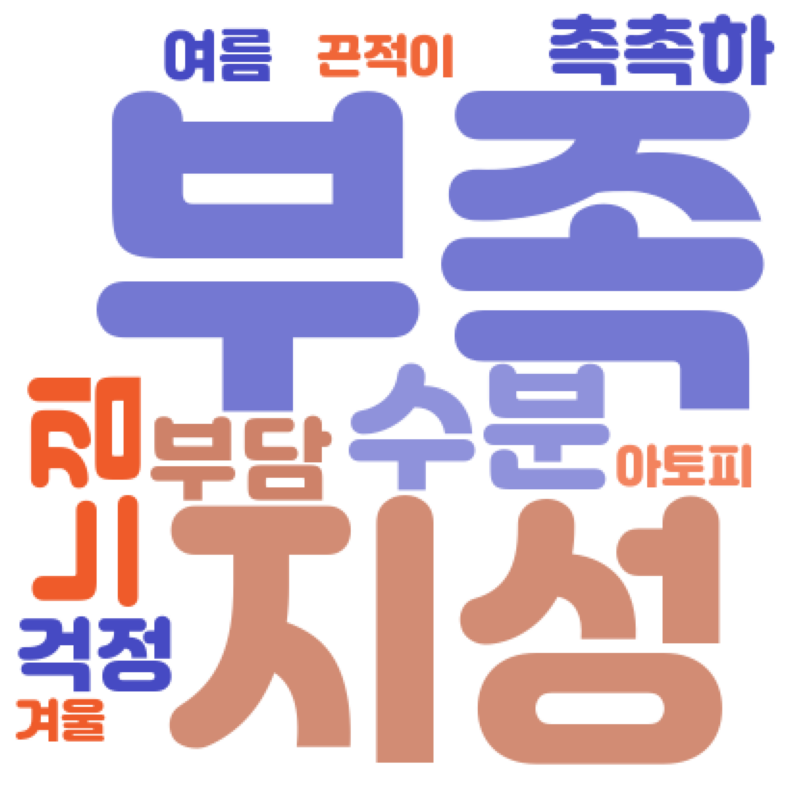

In [35]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue) 지정
    hue_choices = [15,238]    #np.random.randint(50, 100)   # 색상의 기본 톤 hsl(15, 86%, 72%)  hsl(238, 51%, 51%)
    hue = np.random.choice(hue_choices)
    # 채도(saturation) 지정
    saturation_choices = [86,51]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(51, 72)   # 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Skincare_B_negative_wordcloud') #파일 저장 #black soybean

## 긍정

In [36]:
unique_positive_df_sorted

,단어,빈도
0,만족,58
1,제품,40
2,구매,38
3,않,45
4,주,37
5,습니다,36
6,건조,36
7,너무,34
8,저,28
9,꾸준히,28


In [37]:
#긍정
#불필요한 글자 제거
df_word2 = unique_positive_df_sorted.drop(index=[3,4,5,7,8,10,11,12,14,16,18,20,22])
df_word2

,단어,빈도
0,만족,58
1,제품,40
2,구매,38
6,건조,36
9,꾸준히,28
13,피부,17
15,보습,12
17,순하,6
19,발리,6
21,자극,5


In [38]:
# DataFrame -> Dictionary
dic_word2 = df_word2.set_index('단어').to_dict()['빈도']
dic_word2

{'만족': 58,
 '제품': 40,
 '구매': 38,
 '건조': 36,
 '꾸준히': 28,
 '피부': 17,
 '보습': 12,
 '순하': 6,
 '발리': 6,
 '자극': 5,
 '화장': 4,
 '개선': 4}

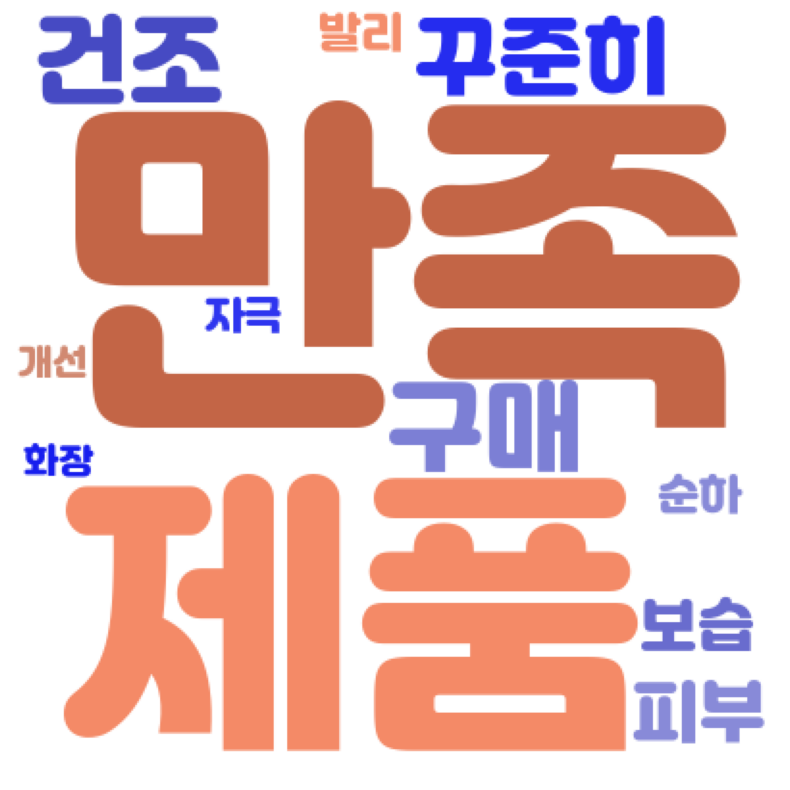

In [42]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue) 지정
    hue_choices = [15,238]    #np.random.randint(50, 100)   # 색상의 기본 톤 hsl(15, 86%, 72%)  hsl(238, 51%, 51%)
    hue = np.random.choice(hue_choices)
    # 채도(saturation) 지정
    saturation_choices = [86,51]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(51, 72)   # 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word2)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Skincare_B_positive_wordcloud') #파일 저장